Enter your pick up point HAWA MAHAL
Enter your destination pointBIRLA MANDIR
The shortest path from HAWA MAHAL to BIRLA MANDIR is HAWA MAHAL -> AMBER FORT -> JAL MAHAL -> JANTR MANTR -> BIRLA MANDIR with a distance of 12 km.


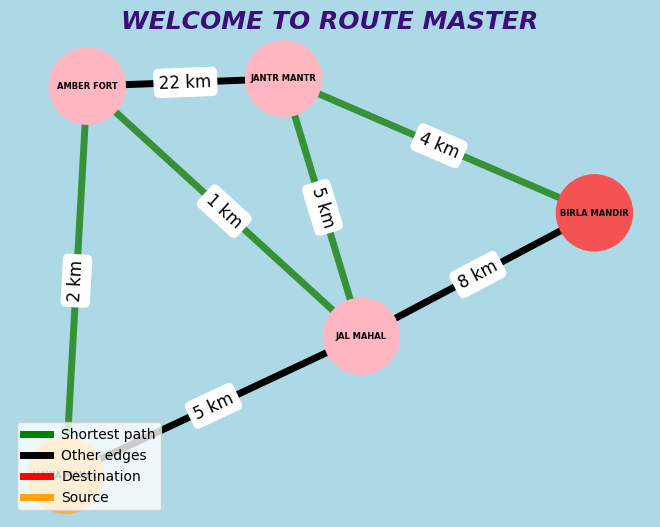

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def dijkstra(graph, start, end):
    # Initialize distances to all nodes as infinity, except for the start node
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    # Keep track of the shortest path to each node
    prev = {node: None for node in graph}

    # Use a priority queue to keep track of nodes to visit
    pq = [(0, start)]

    while len(pq) > 0:
        curr_dist, curr_vert = heapq.heappop(pq)

        # Stop if we've reached the end node
        if curr_vert == end:
            break

        # Skip if the current distance is greater than the recorded distance
        if curr_dist > distances[curr_vert]:
            continue

        # Visit neighboring vertices
        for neighbor, weight in graph[curr_vert].items():
            distance = curr_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                prev[neighbor] = curr_vert
                heapq.heappush(pq, (distance, neighbor))

    # Construct the shortest path
    path = []
    curr_node = end
    while curr_node is not None:
        path.insert(0, curr_node)
        curr_node = prev[curr_node]

    # Return the shortest path and its distance
    return path, distances[end]

# Example usage
graph = {
    'HAWA MAHAL': {'AMBER FORT': 2, 'JAL MAHAL': 5},
    'AMBER FORT': {'HAWA MAHAL': 2, 'JAL MAHAL': 1, 'JANTR MANTR': 22},
    'JAL MAHAL': {'HAWA MAHAL': 5, 'AMBER FORT': 1, 'JANTR MANTR': 5},
    'JANTR MANTR': {'AMBER FORT': 22, 'JAL MAHAL': 5, 'BIRLA MANDIR': 4},
    'BIRLA MANDIR': {'JANTR MANTR': 4,'JAL MAHAL' :8 }
    #'NAHAR GARH' :{'AMBER FORT' : 9}
   # 'ALBERT HALL':{'HAWA MAHAL' : 1}
    #'JKLU' :{'HAWA MAHAL' : 23, 'AMBER FORT' : 30, 'JAL MAHAL' :28,'JANTR MANTR' :23 ,'BIRLA MANDIR' : 21,'NAHAR GARH':37,'ALBERT HALL':22}
}

start_node = input("Enter your pick up point ")
end_node = input ("Enter your destination point")

# Find the shortest path
shortest_path, distance = dijkstra(graph, start_node, end_node)

# Print the result
print(f"The shortest path from {start_node} to {end_node} is {' -> '.join(shortest_path)} with a distance of {distance} km.")

# Draw the graph with the shortest path highlighted
G = nx.Graph()
for node in graph:
    G.add_node(node)

for node, edges in graph.items():
    for neighbor, weight in edges.items():
        G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G)
edge_colors = ['#379237' if (u, v) in zip(shortest_path[:-1], shortest_path[1:]) else 'black' for u, v in G.edges()]

node_colors = ['#FEB139' if node == start_node else '#F55353' if node == end_node else 'LIGHTPINK' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, edge_color=edge_colors, width=5, edge_cmap=plt.cm.Blues, node_size=3000, font_size=6)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']} km" for u, v, d in G.edges(data=True)}, font_size=12)

font = {'color': '#3A1078', 'fontstyle': 'oblique'}
plt.title("WELCOME TO ROUTE MASTER", fontsize=18, fontweight="bold", fontdict=font)


# Add legend for edge colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='green', lw=5, label='Shortest path'),
                   Line2D([0], [0], color='black', lw=5, label='Other edges'),
                   Line2D([0], [0], color='RED', lw=5, label='Destination'),
                   Line2D([0], [0], color='ORANGE', lw=5, label='Source')]
plt.legend(handles=legend_elements, loc='lower left')

# Set background color
fig = plt.gcf()
#fig = plt.figure(figsize=(100, 100))
fig.set_facecolor('lightblue')

plt.show()